In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import Numerov
import utils
import Hartree_XC
import numpy as np
import Atomic_Like_Potential as ALP
from Atomic_Like_Potential import V_eff
from Radial_Eigenfunction import Radial_Eigenfunction

In [3]:
kwargs={'delta_x': 0.0001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':-0.5}

In [4]:
r_grid_reversed= utils.get_uniform_r_grid(**kwargs)

u_hydr= utils.U_Hydrogen(r_grid_reversed)

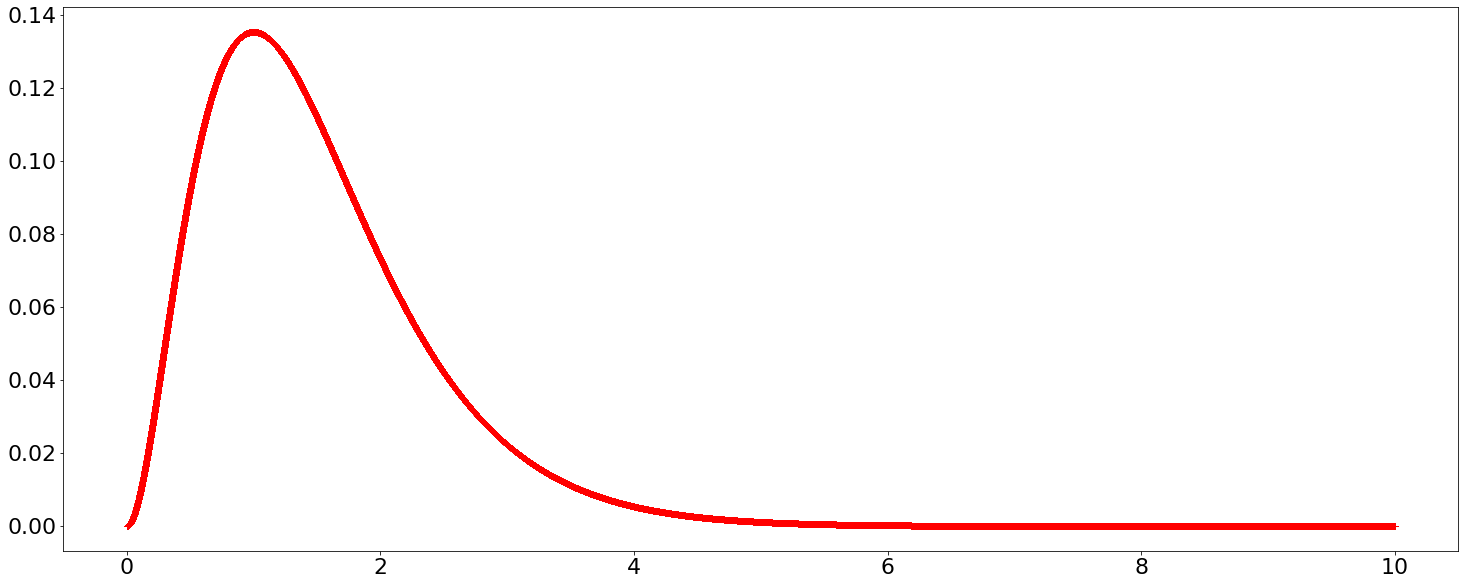

In [5]:
plt.plot(r_grid_reversed,u_hydr**2,'r+')
plt.show()

In [6]:
r_grid_reversed[-1]

9.966808872359859e-12

In [7]:
u_hydr[0]

0.00045399929762484856

In [8]:
u_hydr[-1]

9.966808872260521e-12

In [9]:
# RK4 implementation

E= kwargs['E']
h= kwargs['delta_x']
Z= kwargs['Z']
l= kwargs['l']
w10= u_hydr[0]
w20= (u_hydr[1] - u_hydr[0])/h

w1=[w10]
w2=[w20]

for i,ri in enumerate(r_grid_reversed[:-1]):
    k1=4*[0.0]
    k2=4*[0.0]
    vj0= ALP.V_coulomb(ri, Z) + ALP.V_angular(ri, l)
    vj12= ALP.V_coulomb(ri + 0.5*h, Z) + ALP.V_angular(ri + 0.5*h, l)
    vj3= ALP.V_coulomb(ri + h, Z) + ALP.V_angular(ri + h, l)
    for j in range(4):
        #k1[j]=h*(w2[i] + 0.5*k2[j-1])
        if j == 0:
            k1[j]=h*(w2[i])
            k2[j]= h*2.0*(vj0 - E)*w1[i]
        elif j == 1 or j == 2:
            k1[j]=h*(w2[i] + 0.5*k2[j-1])
            k2[j]= h*2.0*(vj12 - E)*(w1[i] + 0.5*k1[j-1])
        elif j == 3:
            k1[j]=h*(w2[i] + k2[j-1])
            k2[j]= h*2.0*(vj3- E)*(w1[i] + k1[j-1])
    w1.append( w1[i] + (1.0/6.0)*(k1[0] + 2.0*k1[1] + 2.0*k1[2] + k1[3]))
    w2.append( w2[i] + (1.0/6.0)*(k2[0] + 2.0*k2[1] + 2.0*k2[2] + k2[3]))

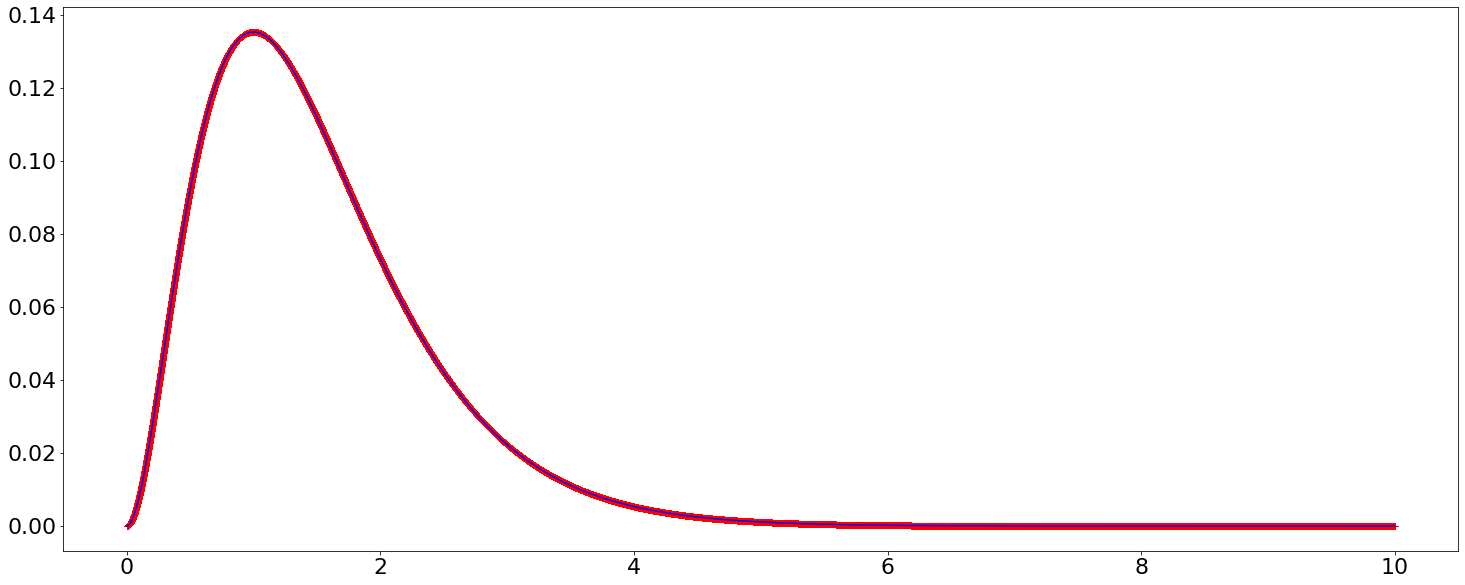

In [12]:
plt.plot(r_grid_reversed,np.array(w1)**2,'r+', r_grid_reversed,u_hydr**2,'b-')
plt.show()

In [11]:
np.abs(np.array(w1)- u_hydr)

array([0.00000000e+00, 1.81605317e-12, 3.63211539e-12, ...,
       9.99444258e-05, 9.99504975e-05, 9.99543529e-05])